# Das Anscombe-Quartett

Es besteht aus vier Mengen von jeweils 11 Datenpunkten, die nahezu identische einfache statistische Eigenschaften haben, aber in einer Grafik sehr verschieden aussehen.

Die fast identischen Eigenschaften sind
*  die Mittelwerte,
*  die Varianzen und
*  die Korrelation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

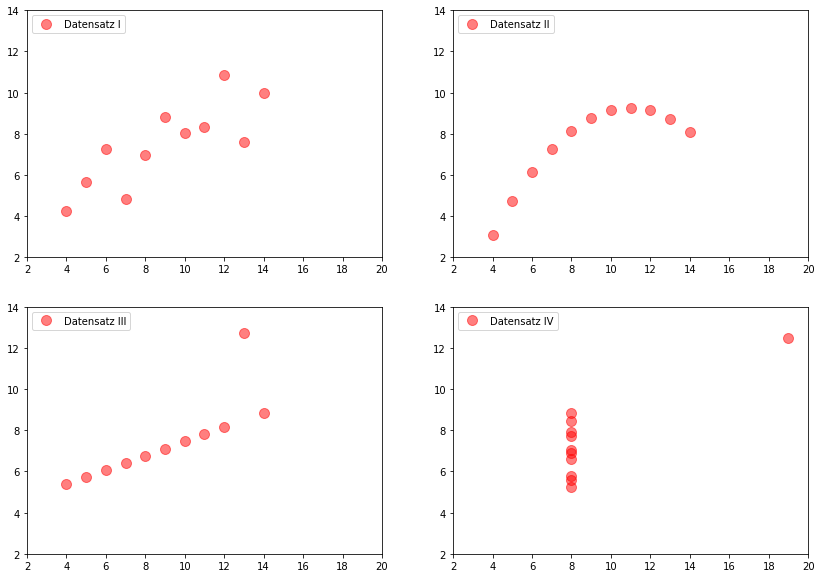

In [2]:
daten = np.array([
#    I                II             III             IV
# x       y       x       y       x       y      x        y
10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58,
8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76,
13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71,
9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84,
11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47,
14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04,
6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25,
4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.50,
12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56,
7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91,
5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]).reshape((11,4,2)).transpose()

labels = ('Datensatz I', 'Datensatz II', 'Datensatz III', 'Datensatz IV')
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for i in range(4):
    j,k = divmod(i,2)
    axes[j,k].plot(daten[0,i,:], daten[1,i,:], 'ro', markersize=10, alpha=0.5, label=labels[i])
    axes[j,k].set_xlim((2,20))
    axes[j,k].set_ylim((2,14))
    axes[j,k].legend(loc='upper left')
plt.show()

## Berechnung der arithmetischen Mittelwerte

In [3]:
n = 11
x_M = [sum(daten[0,i,:])/n for i in range(4)]
y_M = [sum(daten[1,i,:])/n for i in range(4)]
s = 'Die Mittelwerte der x-Werte: ' + '%7.02f'*4
print(s % tuple(x_M))
s = 'Die Mittelwerte der y-Werte: ' + '%7.02f'*4
print(s % tuple(y_M))

Die Mittelwerte der x-Werte:    9.00   9.00   9.00   9.00
Die Mittelwerte der y-Werte:    7.50   7.50   7.50   7.50


## Berechnung der Varianzen

In [4]:
sigma_x = [sum((daten[0,i,:]-x_M[i])**2)/n for i in range(4)]
sigma_y = [sum((daten[1,i,:]-y_M[i])**2)/n for i in range(4)]
s = 'Die Varianzen der x-Werte: ' + '%7.02f'*4
print(s % tuple(sigma_x))
s = 'Die Varianzen der y-Werte: ' + '%7.02f'*4
print(s % tuple(sigma_y))

Die Varianzen der x-Werte:   10.00  10.00  10.00  10.00
Die Varianzen der y-Werte:    3.75   3.75   3.75   3.75


## Berechnung der Korrelation

$$ r = \frac{\sigma_{xy}}{\sigma_x \cdot \sigma_y}, \quad \sigma_{xy} = \frac{1}{n} \sum_{t=1}^n (x_t - \overline x) (y_t - \overline y) $$

In [5]:
from math import sqrt
sigma_xy = [sum((daten[0,i,:]-x_M[i])*(daten[1,i,:]-y_M[i]))/n for i in range(4)]
r = [sigma_xy[i]/(sqrt(sigma_x[i]*sigma_y[i])) for i in range(4)]
s = 'Die Kovarianzen:   ' + '%7.02f'*4
print(s % tuple(sigma_xy))
s = 'Die Korrelationen: ' + '%7.02f'*4
print(s % tuple(r))

Die Kovarianzen:      5.00   5.00   5.00   5.00
Die Korrelationen:    0.82   0.82   0.82   0.82


## Lineare Regression


$$ y = a + bx, \quad b = \frac{\sigma_{xy}}{\sigma_x^2}, \quad a = \overline y - b \overline x $$

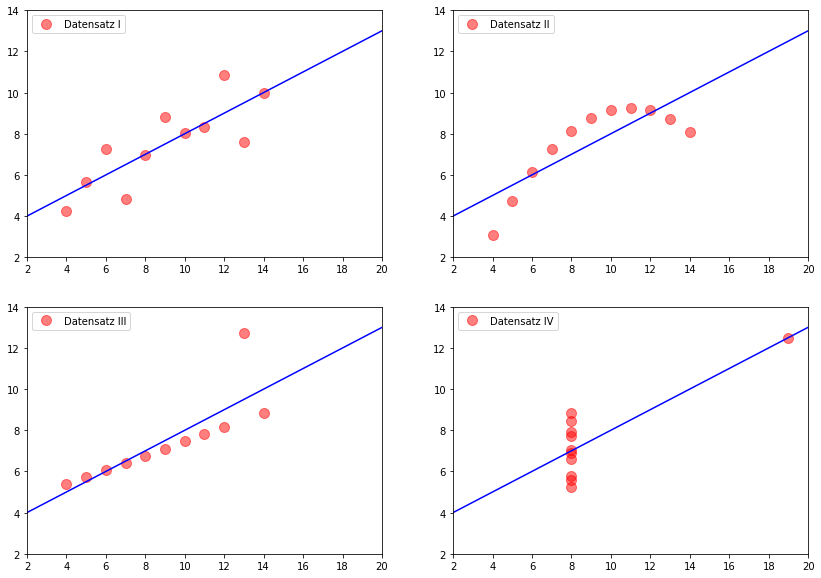

In [6]:
b = np.array(sigma_xy) / np.array(sigma_x)
a = y_M - b * x_M

x = np.linspace(2,20,100)
fig, axes = plt.subplots(2, 2, figsize=(14,10))
for i in range(4):
    j,k = divmod(i,2)
    axes[j,k].plot(daten[0,i,:], daten[1,i,:], 'ro', markersize=10, alpha=0.5, label=labels[i])
    axes[j,k].plot(x, a[i] + b[i]*x, 'b-')
    axes[j,k].set_xlim((2,20))
    axes[j,k].set_ylim((2,14))
    axes[j,k].legend(loc='upper left')
plt.show()